In [10]:
import numpy as np
from credo import load_data
from sklearn.metrics import normalized_mutual_info_score
from matplotlib import pyplot as plt
from skimage.transform import probabilistic_hough_line
from scipy.ndimage import rotate


def angle(x, y):
    rad = np.arctan2(y, x)
    degrees = rad*180/np.pi
    return degrees


def round_normalize(image):
    lines = probabilistic_hough_line(image, threshold=10, line_length=5, line_gap=3)
    angles = []
    for l in lines:
        vector_1 = [l[1][1] - l[0][1], l[1][0] - l[0][0]]
        #print(vector_1)
        angles.append(angle(l[1][0] - l[0][0], l[1][1] - l[0][1]))
    deg = np.average(angles) if len(angles) else 0
    #print(deg)
    #print("")

    mask = np.where(image == 0, 0.0, 1.0)
    rotated_mask = rotate(mask, deg, reshape=False)
    rotated_image = rotate(image, deg, reshape=False)
    rotated_image = np.where(rotated_mask < 0.25, 0, rotated_image)
    rotated_image = np.where(rotated_image < 0, 0, rotated_image)
    rotated_image = np.where(rotated_image > 1, 1, rotated_image)
    return rotated_image


def normalize_rotation(images, method):
    img = []
    print('Normalize rotation 0 of %d images...' % len(images))
    c = 0
    for i in images:
        c += 1
        img.append(method(i))
        if c % 100 == 0:
            print('Normalize rotation %d of %d images...' % (c, len(images)))
    ret = np.array(img)
    return ret


(x_train, y_train), (x_test, y_test) = load_data(use_worms=False, use_dots=False, use_tracks=True, cut_to_mnist=False)

Normalize rotation 0 of 3065 images...
Normalize rotation 100 of 3065 images...
Normalize rotation 200 of 3065 images...
Normalize rotation 300 of 3065 images...
Normalize rotation 400 of 3065 images...
Normalize rotation 500 of 3065 images...
Normalize rotation 600 of 3065 images...
Normalize rotation 700 of 3065 images...
Normalize rotation 800 of 3065 images...
Normalize rotation 900 of 3065 images...
Normalize rotation 1000 of 3065 images...
Normalize rotation 1100 of 3065 images...
Normalize rotation 1200 of 3065 images...
Normalize rotation 1300 of 3065 images...
Normalize rotation 1400 of 3065 images...
Normalize rotation 1500 of 3065 images...
Normalize rotation 1600 of 3065 images...
Normalize rotation 1700 of 3065 images...
Normalize rotation 1800 of 3065 images...
Normalize rotation 1900 of 3065 images...
Normalize rotation 2000 of 3065 images...
Normalize rotation 2100 of 3065 images...
Normalize rotation 2200 of 3065 images...
Normalize rotation 2300 of 3065 images...
Norm

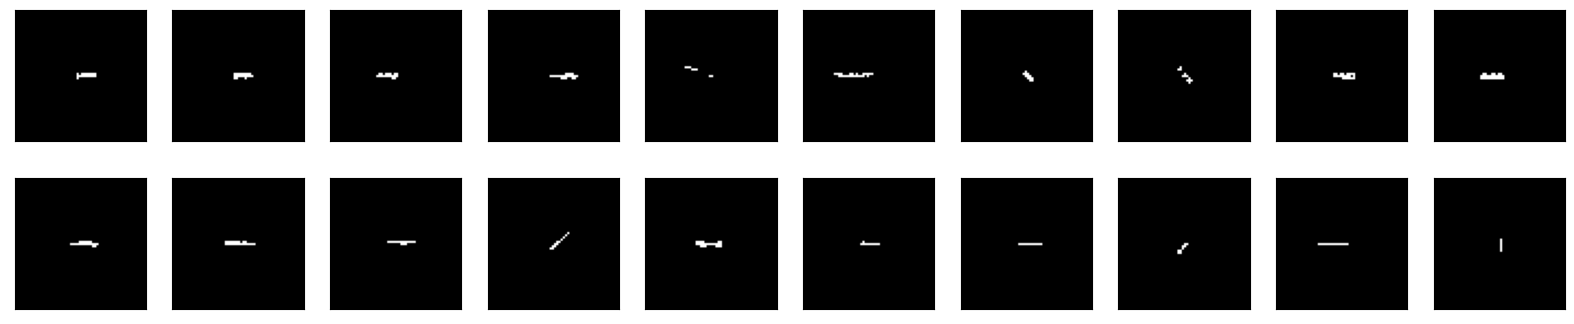

In [11]:
x_test = normalize_rotation(x_test, round_normalize)
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(60, 60))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(x_test[i+10].reshape(60, 60))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
count = x_test.shape[0]
distance = np.zeros((count, count))
print(count)

for a in range(count):
  for b in range(count):
    xx = x_test[a,:,:].ravel().astype(int)
    yy = x_test[b,:,:].ravel().astype(int)
    distance[a][b] = 1 - normalized_mutual_info_score(xx, yy)
  print('%d z %d' % (a, count))

3065
0 z 3065
1 z 3065
2 z 3065
3 z 3065
4 z 3065
5 z 3065
6 z 3065
7 z 3065
8 z 3065
9 z 3065
10 z 3065
11 z 3065
12 z 3065
13 z 3065
14 z 3065
15 z 3065
16 z 3065
17 z 3065
18 z 3065
19 z 3065
20 z 3065
21 z 3065
22 z 3065
23 z 3065
24 z 3065
25 z 3065
26 z 3065
27 z 3065
28 z 3065
29 z 3065
30 z 3065
31 z 3065
32 z 3065
33 z 3065
34 z 3065
35 z 3065
36 z 3065
37 z 3065
38 z 3065
39 z 3065
40 z 3065
41 z 3065
42 z 3065
43 z 3065
44 z 3065
45 z 3065
46 z 3065
47 z 3065
48 z 3065
49 z 3065
50 z 3065
51 z 3065
52 z 3065
53 z 3065
54 z 3065
55 z 3065
56 z 3065
57 z 3065
58 z 3065
59 z 3065
60 z 3065
61 z 3065
62 z 3065
63 z 3065
64 z 3065
65 z 3065
66 z 3065
67 z 3065
68 z 3065
69 z 3065
70 z 3065
71 z 3065
72 z 3065
73 z 3065
74 z 3065
75 z 3065
76 z 3065
77 z 3065
78 z 3065
79 z 3065
80 z 3065
81 z 3065
82 z 3065
83 z 3065
84 z 3065
85 z 3065
86 z 3065
87 z 3065
88 z 3065
89 z 3065
90 z 3065
91 z 3065
92 z 3065
93 z 3065
94 z 3065
95 z 3065
96 z 3065
97 z 3065
98 z 3065
99 z 3065
100 z

In [13]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(affinity="precomputed", linkage='single',
                                     distance_threshold=0, n_clusters=None).fit(distance)
print(clustering.labels_)

[2614 1640 1639 ...    3    1    0]


In [14]:
import pickle
f = open("cache/tracks_hough_match.dat", "wb")
f.write(pickle.dumps(distance))
f.close()

f = open("cache/tracks_hough_clusters.dat", "wb")
f.write(pickle.dumps(clustering))
f.close()